In [31]:
import numpy as np
import pandas as pd

import os
import json

from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors






In [42]:

for dirname, _, filenames in os.walk('arc_datasets/'):
    print (dirname)
    
data_path=Path('arc_datasets/')

training_path=data_path/'training'
evaluation_path=data_path/'evaluation'
test_path=data_path/'test'


    

abstraction-and-reasoning-challenge/
abstraction-and-reasoning-challenge/training
abstraction-and-reasoning-challenge/evaluation
abstraction-and-reasoning-challenge/test


In [43]:
training_tasks=sorted(os.listdir(training_path))
print(training_tasks[:3])                         # first three tasks from 400 json tasks
                                                  # in each task there are 2 dictionary keys train and test
    



['007bbfb7.json', '00d62c1b.json', '017c7c7b.json']


In [54]:
taskfile=str(training_path/'00d62c1b.json')         

with open(taskfile,'r') as f:
    task=json.load(f)
    
print (task.keys())





dict_keys(['train', 'test'])


In [46]:
n_train_pairs=len(task['train'])
n_test_pairs=len(task['test'])

print (f'task contains {n_train_pairs} training pairs')
print (f'task contains {n_test_pairs} test pairs')



task contains 5 training pairs
task contains 1 test pairs


In [47]:
display(task['train'][0]['input'])
display(task['train'][0]['output'])





[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 0, 3, 0, 0],
 [0, 0, 3, 0, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

[[0, 0, 0, 0, 0, 0],
 [0, 0, 3, 0, 0, 0],
 [0, 3, 4, 3, 0, 0],
 [0, 0, 3, 4, 3, 0],
 [0, 0, 0, 3, 0, 0],
 [0, 0, 0, 0, 0, 0]]

In [58]:
def plot_task(task):
    """
    Plots the first train and test pairs of a specified task,
    using same color scheme as the ARC app
    """
    cmap = colors.ListedColormap(
        ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
         '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
    norm = colors.Normalize(vmin=0, vmax=9)
    fig, axs = plt.subplots(1, 4, figsize=(10,10))
    axs[0].imshow(task['train'][0]['input'], cmap=cmap, norm=norm)
    axs[0].axis('off')
    axs[0].set_title('Train Input')
    axs[1].imshow(task['train'][0]['output'], cmap=cmap, norm=norm)
    axs[1].axis('off')
    axs[1].set_title('Train Output')
    axs[2].imshow(task['test'][0]['input'], cmap=cmap, norm=norm)
    axs[2].axis('off')
    axs[2].set_title('Test Input')
    axs[3].imshow(task['test'][0]['output'], cmap=cmap, norm=norm)
    axs[3].axis('off')
    axs[3].set_title('Test Output')
    plt.tight_layout()
    plt.show()












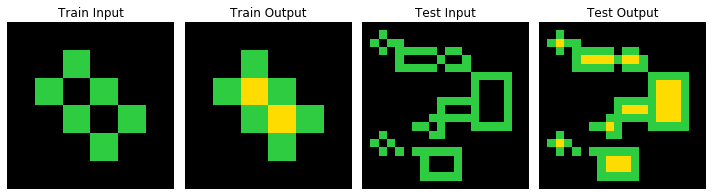

In [59]:
plot_task(task)



In [60]:
submission=pd.read_csv(data_path/'sample_submission.csv', index_col="output_id" )
display(submission.head())




,output
output_id,
00576224_0,|32|78| |32|78| |00|00|
009d5c81_0,|00000000000000|00000888888888|00000800080808|...
00dbd492_0,|00000000000222220000|02222222220200020000|020...
03560426_0,|0000000000|0000000000|0000000000|0000000000|0...
05a7bcf2_0,|000000000020000000080000000000|00000000002220...


In [61]:
def flattner(pred):
    str_pred=str([row for row in pred])
    str_pred = str_pred.replace(', ', '')
    str_pred = str_pred.replace('[[', '|')
    str_pred = str_pred.replace('][', '|')
    str_pred = str_pred.replace(']]', '|')
    return str_pred
        

In [62]:
example_grid=[[1,2,3],[6,7,8],[3,4,9]]
display(example_grid)

print (flattner(example_grid))



[[1, 2, 3], [6, 7, 8], [3, 4, 9]]

|123|678|349|


In [66]:
for output_id in submission.index:
    task_id = output_id.split('_')[0]
    pair_id = int(output_id.split('_')[1])
    f = str(test_path / str(task_id + '.json'))
    with open(f, 'r') as read_file:
        task = json.load(read_file)
    # skipping over the training examples, since this will be naive predictions
    # we will use the test input grid as the base, and make some modifications
    data = task['test'][pair_id]['input'] # test pair input
    # for the first guess, predict that output is unchanged
    pred_1 = flattner(data)
    # for the second guess, change all 0s to 5s
    data = [[5 if i==0 else i for i in j] for j in data]
    pred_2 = flattner(data)
    # for the last gues, change everything to 0
    data = [[0 for i in j] for j in data]
    pred_3 = flattner(data)
    # concatenate and add to the submission output
    pred = pred_1 + ' ' + pred_2 + ' ' + pred_3 + ' ' 
    submission.loc[output_id, 'output'] = pred

submission.to_csv('submission.csv')

In [ ]:
# correct prediction format 




